In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
import numpy as np
# %matplotlib inline

In [4]:
# available graphs
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [5]:
plt.style.use(['dark_background', 'seaborn-talk'])
plt.style.use(['fivethirtyeight'])

In [6]:
links = pd.read_csv('email-links-all.csv')

In [7]:
links.shape

(614586, 4)

In [8]:
links = links[links.Date > '1999-01-01 00:00:00'][links.Date < '2002-7-31 00:00:00']

C:\Users\parsellj\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [9]:
links.head()

,Unnamed: 0,Date,From,To
0,0,2001-05-14 23:39:00,phillip.allen@enron.com,tim.belden@enron.com
1,1,2001-05-04 20:51:00,phillip.allen@enron.com,john.lavorato@enron.com
2,2,2000-10-18 10:00:00,phillip.allen@enron.com,leah.arsdall@enron.com
3,3,2000-10-23 13:13:00,phillip.allen@enron.com,randall.gay@enron.com
4,4,2000-08-31 12:07:00,phillip.allen@enron.com,greg.piper@enron.com


Count the number of contact events between emails. Here, we consider the number of interactions as weights.

In [10]:
weight_counts = links.groupby(['From', 'To']).size().reset_index(name = 'Count')
weight_counts.to_csv('weighted_links.csv', index=False)

In [11]:
weight_counts.shape

(83679, 3)

In [12]:
weight_counts.sort_values('Count').head()

,From,To,Count
0,101qi@msn.com,enlvwvz@msn.com,1
39592,karen@mpenner.com,kenneth.lay@enron.com,1
39601,kari.oquinn@enron.com,amy.fitzpatrick@enron.com,1
39602,kari.oquinn@enron.com,david.oxley@enron.com,1
39603,kari.oquinn@enron.com,jeanie.slone@enron.com,1


In [13]:
thresholded_weight_counts = weight_counts.loc[weight_counts['Count'] > 10]

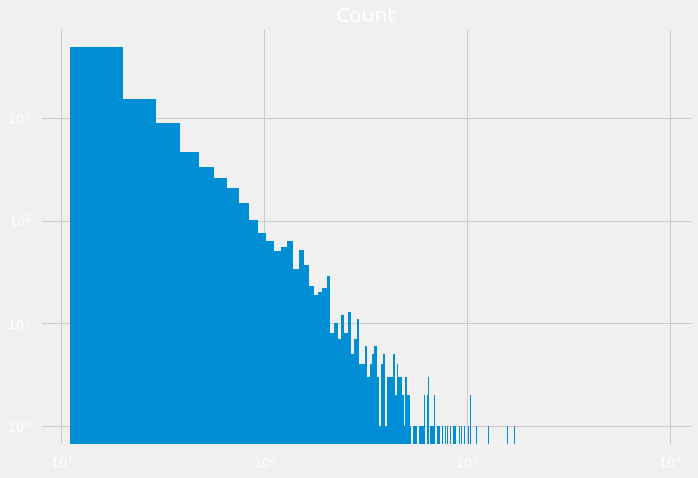

In [14]:
fig, ax = plt.subplots()
thresholded_weight_counts.hist(ax=ax, column='Count', bins=1000)
ax.set_xscale('log')
ax.set_yscale('log')

Count From messages per email

In [15]:
from_counts = links.groupby(['From']).size().reset_index(name = 'CountFrom')
from_counts.sort_values('CountFrom').shape

(12641, 2)

Get timestamps for each From email

In [16]:
from_spikes = links.groupby('From')['Date'].apply(list)
from_spikes.size

12641

Threshold. Discard emails that are note active

In [17]:
from_spikes = from_spikes[from_spikes.str.len() > 3]
from_spikes.size

6600

In [18]:
from_spikes[:10]

From
1800flowers@shop2u.com             [2000-11-21 01:21:00, 2000-11-21 01:21:00, 200...
2000greetings@postalmanager.com    [2002-01-08 18:25:48, 2002-01-22 17:53:03, 200...
2740741@skytel.com                 [2000-09-06 15:34:00, 2000-09-06 16:33:00, 200...
40ees@enron.com                    [2001-10-05 18:45:16, 2001-10-05 18:45:16, 200...
40enron@enron.com                  [2001-06-06 18:08:58, 2001-05-03 19:48:48, 200...
7409949@skytel.com                 [2001-06-26 17:07:00, 2001-07-18 21:04:00, 200...
7409950@skytel.com                 [2001-11-25 20:17:03, 2001-11-25 20:22:26, 200...
8774754543@skytel.com              [2001-11-17 17:51:21, 2002-01-17 15:34:43, 200...
8777865122@skytel.com              [2002-01-10 19:10:59, 2002-01-10 19:00:10, 200...
9069761@skytel.com                 [2001-07-18 20:20:00, 2000-11-07 13:47:00, 200...
Name: Date, dtype: object

Timerange in the dataset

In [19]:
timestamps = list(set(links.Date.tolist()))
timestamps = [datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in timestamps]
len(timestamps)

166219

In [20]:
#extract the earliest and the latest dates in the dataset
start_time = min(timestamps)
end_time = max(timestamps)

In [21]:
start_time.strftime("%d %b %Y")

'04 Jan 1999'

In [22]:
end_time.strftime("%d %b %Y")

'21 Dec 2002'

Extracting spikes

In [24]:
#visualize timeline. Assign random number to each timestamp
n = 10
for label, time in zip(from_spikes.keys[:n], from_spikes.values[:n]):
    for label, time in from_spikes[:].iteritems():
        unique_elements, counts_elements = np.unique(time, return_counts=True)
time = list(set(time))
time = unique_elements
plt.plot_date(time, counts_elements)
plt.legend()

TypeError: 'method' object is not subscriptable

In [25]:
activations = pd.DataFrame(columns=['address', 'activations'])
activations_series = pd.Series()
i = 0
for label, time in from_spikes[:].iteritems():
    unique_elements, counts_elements = np.unique(time, return_counts=True)
    counts_elements = np.append(counts_elements, 0)
    counts_elements = np.insert(counts_elements, 0, 0)
    unique_elements = np.append(unique_elements, end_time)
    unique_elements = np.insert(unique_elements, 0, start_time)
    d = {'Counts': counts_elements}
    df = pd.DataFrame(data = d, index = pd.to_datetime(unique_elements))
    df = df.Counts.resample('D').sum()
    t = df.values.shape
    vals = {k:x for k,x in enumerate(df.values) if x != 0}
    activations.loc[i] = [label, vals]
    activations_series[label] = vals
    i += 1
print(t) # length of a time-series

(1448,)


In [26]:
dates = list(df.keys())

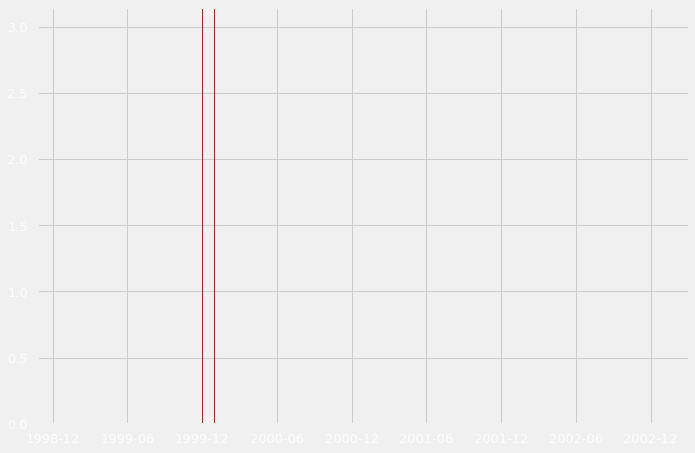

In [28]:
#December

series = activations_series[6056]
zeros = np.zeros(t[0])

for k,v in series.items():
     zeros[k] = v

plt.bar(list(df.keys())[359 + 365 - 31 : 359 + 365], zeros[359 + 365 - 31 : 359 + 365])
plt.bar(dates, zeros)
plt.axvline(x= '1999-12-01 00:00:00', color='r', linewidth=1)
plt.axvline(x= '1999-12-31 00:00:00', color='r', linewidth=1)

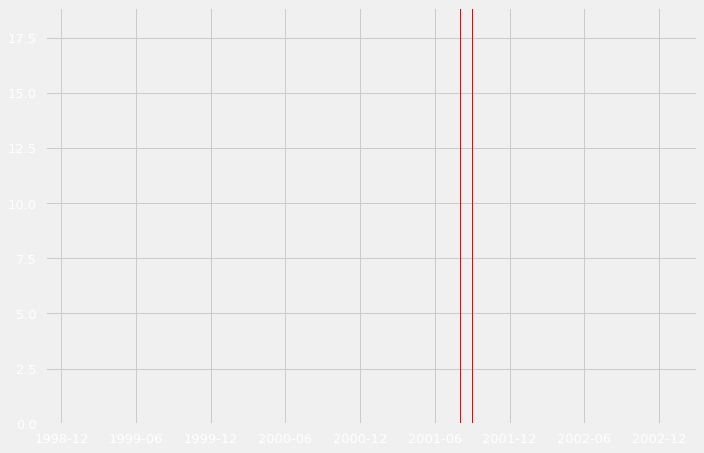

In [29]:
#August

series = activations_series[2720]
zeros = np.zeros(t[0])

for k,v in series.items():
     zeros[k] = v

plt.bar(list(df.keys())[359 + 365 + 366 + 213 : 359 + 365 + 366 + 244], zeros[359 + 365 + 366 + 213 : 359 + 365 + 366 + 244])
plt.bar(dates, zeros)
plt.axvline(x= '2001-08-01 00:00:00', color='r', linewidth=1)
plt.axvline(x= '2001-08-31 00:00:00', color='r', linewidth=1)

In [30]:
summary_all = np.zeros(t[0])
for series in activations_series:
    for k,v in series.items():
        summary_all[k] += v

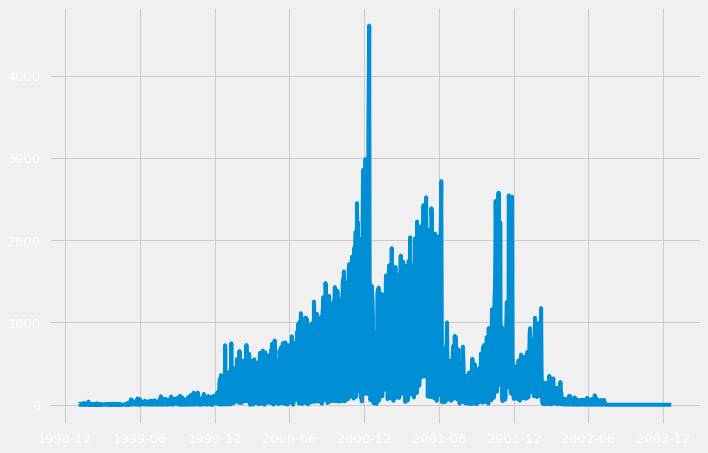

In [31]:
plt.plot(dates, summary_all)

In [32]:
activations_series.to_csv('activations-enron.csv')

In [33]:
emails_activated = list(activations_series.index)

In [34]:
weight_counts = weight_counts[weight_counts.From.isin(emails_activated)]

In [35]:
weight_counts = weight_counts[weight_counts.To.isin(emails_activated)]

In [36]:
weight_counts.shape

(50897, 3)

In [37]:
weight_counts.to_csv('weighted_links_activated.csv', index=False)

Assign IDs to emails

In [38]:
email_id = {x:i for i,x in enumerate(emails_activated)}

In [39]:
id_email = {i:x for i,x in enumerate(emails_activated)}

In [46]:
import csv
with open('id-email.csv', 'wb') as csv_file:
     writer = csv.writer(csv_file)
     for key, value in id_email.items():
         writer.writerow([key, value])

TypeError: a bytes-like object is required, not 'str'

In [47]:
activations = pd.DataFrame(columns=['address', 'activations'])
activations_series = pd.Series()
i = 0
for label, time in from_spikes[:].iteritems():
    unique_elements, counts_elements = np.unique(time, return_counts=True)
    counts_elements = np.append(counts_elements, 0)
    counts_elements = np.insert(counts_elements, 0, 0)
    unique_elements = np.append(unique_elements, end_time)
    unique_elements = np.insert(unique_elements, 0, start_time)
    d = {'Counts': counts_elements}
    df = pd.DataFrame(data = d, index = pd.to_datetime(unique_elements))
    df = df.Counts.resample('D').sum()
    t = df.values.shape
    vals = {k:x for k,x in enumerate(df.values) if x != 0}
    activations.loc[i] = [label, vals]
    activations_series.loc[email_id[label]] = vals
    i += 1

In [48]:
for i, row in weight_counts.iterrows():
    weight_counts.loc[i] = [email_id[row.From], email_id[row.To], row.Count]

In [49]:
weight_counts.head()

,From,To,Count
36,0,1760,3
45,2,2692,6
57,3,2719,2
58,3,3118,2
59,3,5211,2


In [50]:
weight_counts.to_csv('weighted_links_activated_id_1999_2002.csv', index=False)

In [51]:
activations_series.to_csv('activations-enron_id_1999_2002.csv')

In [52]:
id_email.get(6056)

'tangie.dykes@enron.com'

Compute summary statistics for the events

In [53]:
apr01 = pd.read_csv("events/Xapr01.csv", header=None)
aug01 = pd.read_csv("events/Xaug01.csv", header=None)
dec99 = pd.read_csv("events/Xdec99.csv", header=None)
may01 = pd.read_csv("events/Xmay01.csv", header=None)
may01STD = pd.read_csv("events/Xmay01STD.csv", header=None)
apr01STD = pd.read_csv("events/Xapr01STD.csv", header=None)
aug01STD = pd.read_csv("events/Xaug01STD.csv", header=None)
dec99STD = pd.read_csv("events/Xdec99STD.csv", header=None)
apr01STD_99_02 = pd.read_csv("events/Xapr01STD_99_02.csv", header=None)
may01STD_99_02 = pd.read_csv("events/Xmay01STD_99_02.csv", header=None)
aug01STD_99_02 = pd.read_csv("events/Xaug01STD_99_02.csv", header=None)
dec99STD_99_02 = pd.read_csv("events/Xdec99STD_99_02.csv", header=None)

In [54]:
apr01_cluster = [v[0] for v in apr01.values]
aug01_cluster = [v[0] for v in aug01.values]
dec99_cluster = [v[0] for v in dec99.values]
may01_cluster = [v[0] for v in may01.values]
may01STD_cluster = [v[0] for v in may01STD.values]
apr01STD_cluster = [v[0] for v in apr01STD.values]
aug01STD_cluster = [v[0] for v in aug01STD.values]
dec99STD_cluster = [v[0] for v in dec99STD.values]
apr01STD_99_02_cluster = [v[0] for v in apr01STD_99_02.values]
may01STD_99_02_cluster = [v[0] for v in may01STD_99_02.values]
aug01STD_99_02_cluster = [v[0] for v in aug01STD_99_02.values]
dec99STD_99_02_cluster = [v[0] for v in dec99STD_99_02.values]

In [55]:
def compute_summary(cluster):
    summary = np.zeros(t[0])
    for addr in cluster:
        series = activations_series[addr]
        for k,v in series.items():
            summary[k] += v
    return summary

In [56]:
summary_apr = compute_summary(apr01_cluster)
summary_aug = compute_summary(aug01_cluster)
summary_dec = compute_summary(dec99_cluster)
summary_may = compute_summary(may01_cluster)
summary_may_std = compute_summary(may01STD_cluster)
summary_apr_std = compute_summary(apr01STD_cluster)
summary_aug_std = compute_summary(aug01STD_cluster)
summary_dec_std = compute_summary(dec99STD_cluster)
summary_apr_99_02_std = compute_summary(apr01STD_99_02_cluster)
summary_may_99_02_std = compute_summary(may01STD_99_02_cluster)
summary_aug_99_02_std = compute_summary(aug01STD_99_02_cluster)
summary_dec_99_02_std = compute_summary(dec99STD_99_02_cluster)

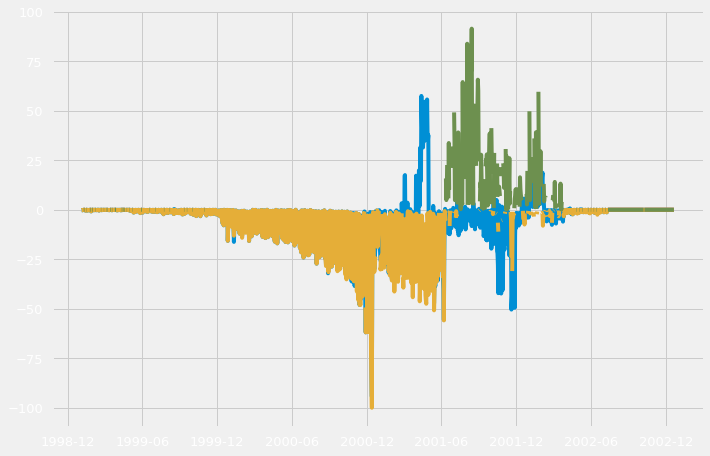

In [57]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0.0, 2.0, 0.01)
s = np.sin(2 * np.pi * t)

upper = 0
lower = 0


s = summary_aug_99_02_std * 100 / max(summary_aug_99_02_std) - summary_all * 100 / max(summary_all)
supper = np.ma.masked_where(s < upper, s)
slower = np.ma.masked_where(s > lower, s)
smiddle = np.ma.masked_where(np.logical_or(s < lower, s > upper), s)

fig, ax = plt.subplots()
ax.plot(dates, summary_apr_99_02_std * 100.0 / max(summary_apr_99_02_std) - summary_all * 100 / max(summary_all))
ax.plot(dates, smiddle, dates, slower, dates, supper)
plt.show()

In [58]:
def keep_positive_numbers(l):
    return map(lambda x: 0 if x<0 else x, l)

RuntimeError: matplotlib does not support generators as input

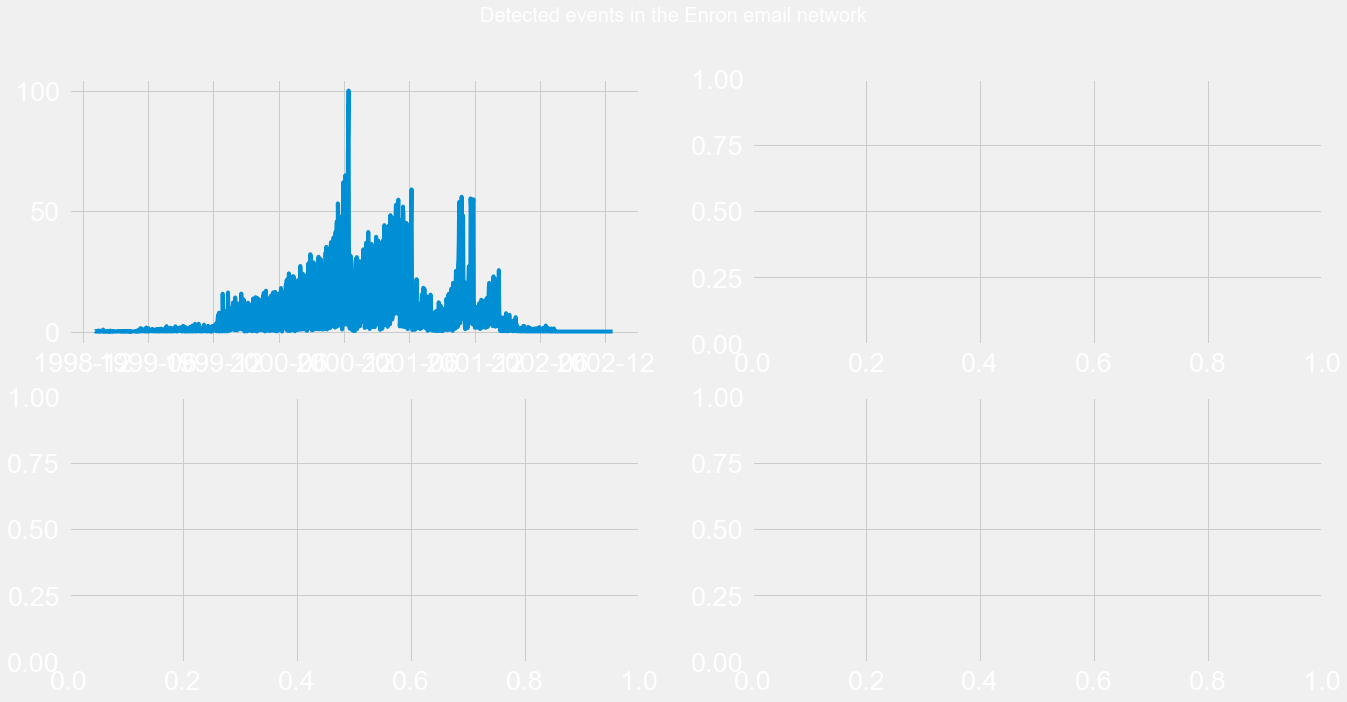

In [59]:
from pylab import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['xtick.labelsize'] = 27
rcParams['ytick.labelsize'] = 27
font = 30
color = '#0099FF'
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig.suptitle("Detected events in the Enron email network", fontsize=20)

ax[0][0].plot(dates, summary_all * 100 / max(summary_all))
s = summary_apr_99_02_std * 100.0 / max(summary_apr_99_02_std) - summary_all * 100 / max(summary_all)
ax[0][0].plot(dates, keep_positive_numbers(s), color)
ax[0][0].axvline(x= '2001-04-01 00:00:00', color='r', linewidth=1)
ax[0][0].axvline(x= '2001-04-30 00:00:00', color='r', linewidth=1)
ax[0][0].axvspan('2001-04-01 00:00:00', '2001-04-30 00:00:00', color='red', alpha=0.5)
ax[0][0].axvspan('2002-01-01 00:00:00', '2002-01-31 00:00:00', color='green', alpha=0.5)
ax[0][0].set_title('April 2001', fontsize=font)
xmin, xmax = ax[0][0].get_xlim()
ax[0][0].set_xticks(np.round(np.linspace(xmin, xmax, 4), 2))
ax[0][0].set_ylabel('Anomaly rate', fontsize=font)

ax[0][1].plot(dates, summary_all * 100 / max(summary_all))
s = summary_may_99_02_std * 100 / max(summary_may_99_02_std) - summary_all * 100 / max(summary_all)
ax[0][1].plot(dates, keep_positive_numbers(s), color)
ax[0][1].axvline(x= '2001-05-01 00:00:00', color='r', linewidth=1)
ax[0][1].axvline(x= '2001-06-15 00:00:00', color='r', linewidth=1)
ax[0][1].axvspan('2001-05-01 00:00:00', '2001-05-31 00:00:00', color='red', alpha=0.5)
ax[0][1].set_title('May 2001', fontsize=font)
ax[0][1].set_xticks(np.round(np.linspace(xmin, xmax, 4), 2))
ax[0][1].set_ylabel('Anomaly rate', fontsize=font)

ax[1][1].plot(dates, summary_all * 100 / max(summary_all))
s = summary_aug_99_02_std * 100 / max(summary_aug_99_02_std) - summary_all * 100 / max(summary_all)
ax[1][1].plot(dates, keep_positive_numbers(s), color)
ax[1][1].axvline(x= '2001-08-01 00:00:00', color='r', linewidth=1)
ax[1][1].axvline(x= '2001-08-31 00:00:00', color='r', linewidth=1)
ax[1][1].axvspan('2001-08-01 00:00:00', '2001-08-31 00:00:00', color='red', alpha=0.5)
ax[1][1].set_title('August 2001', fontsize=font)
ax[1][1].set_xticks(np.round(np.linspace(xmin, xmax, 4), 2))
ax[1][1].set_ylabel('Anomaly rate', fontsize=font)

ax[1][0].plot(dates, summary_all * 100 / max(summary_all))
s = summary_dec_99_02_std * 100 / max(summary_dec_99_02_std) - summary_all * 100 / max(summary_all)
ax[1][0].plot(dates, keep_positive_numbers(s), color)
ax[1][0].axvline(x= '1999-12-01 00:00:00', color='r', linewidth=1)
ax[1][0].axvline(x= '1999-12-31 00:00:00', color='r', linewidth=1)
ax[1][0].axvspan('1999-12-01 00:00:00', '1999-12-31 00:00:00', color='red', alpha=0.5)
ax[1][0].set_title('December 1999', fontsize=font)
ax[1][0].set_xticks(np.round(np.linspace(xmin, xmax, 4), 2))
ax[1][0].set_ylabel('Anomaly rate', fontsize=font)

ax[0][2].plot(dates, summary_all * 100 / max(summary_all))
ax[0][2].set_title('Overall activity')
ax[0][2].set_xticks(np.round(np.linspace(xmin, xmax, 4), 2))

ax[-1][-1].axis('off')

RuntimeError: matplotlib does not support generators as input

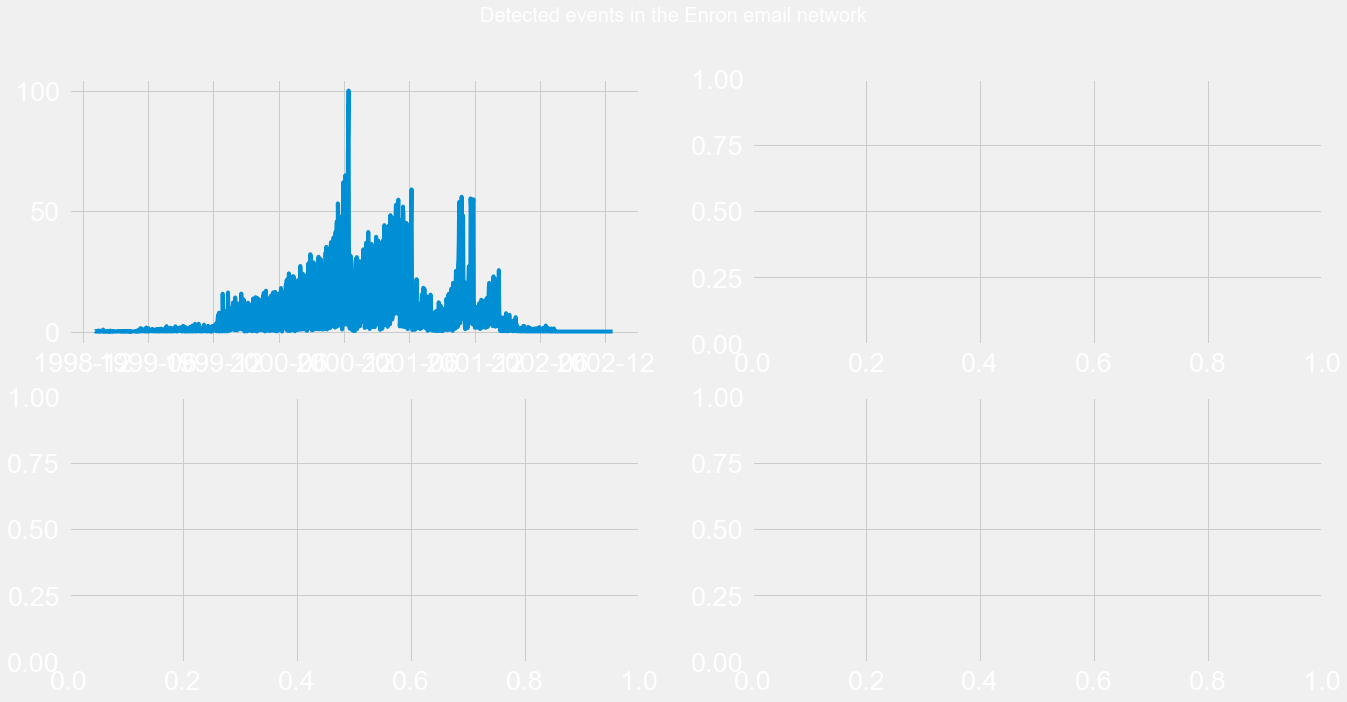

In [60]:
from pylab import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['xtick.labelsize'] = 27
rcParams['ytick.labelsize'] = 27
font = 30
color = '#0099FF'
ylabel = "Normalized activity"
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig.suptitle("Detected events in the Enron email network", fontsize=20)
ax[0][0].plot(dates, summary_all * 100 / max(summary_all))
s = summary_apr_99_02_std * 100.0 / max(summary_apr_99_02_std)
ax[0][0].plot(dates, keep_positive_numbers(s), color)
ax[0][0].axvline(x= '2001-04-01 00:00:00', color='r', linewidth=1)
ax[0][0].axvline(x= '2001-04-30 00:00:00', color='r', linewidth=1)
ax[0][0].axvspan('2001-04-01 00:00:00', '2001-04-30 00:00:00', color='red', alpha=0.5)
ax[0][0].axvspan('2002-01-01 00:00:00', '2002-01-31 00:00:00', color='green', alpha=0.5)
ax[0][0].set_title('April 2001', fontsize=font)
xmin, xmax = ax[0][0].get_xlim()
ax[0][0].set_xticks(np.round(np.linspace(xmin, xmax, 4), 2))
ax[0][0].set_ylabel(ylabel, fontsize=font)

ax[0][1].plot(dates, summary_all * 100 / max(summary_all))
s = summary_may_99_02_std * 100 / max(summary_may_99_02_std)
ax[0][1].plot(dates, keep_positive_numbers(s), color)
ax[0][1].axvline(x= '2001-05-01 00:00:00', color='r', linewidth=1)
ax[0][1].axvline(x= '2001-06-15 00:00:00', color='r', linewidth=1)
ax[0][1].axvspan('2001-05-01 00:00:00', '2001-05-31 00:00:00', color='red', alpha=0.5)
ax[0][1].set_title('May 2001', fontsize=font)
ax[0][1].set_xticks(np.round(np.linspace(xmin, xmax, 4), 2))
ax[0][1].set_ylabel(ylabel, fontsize=font)

ax[1][1].plot(dates, summary_all * 100 / max(summary_all))
s = summary_aug_99_02_std * 100 / max(summary_aug_99_02_std)
ax[1][1].plot(dates, keep_positive_numbers(s), color)
ax[1][1].axvline(x= '2001-08-01 00:00:00', color='r', linewidth=1)
ax[1][1].axvline(x= '2001-08-31 00:00:00', color='r', linewidth=1)
ax[1][1].axvspan('2001-08-01 00:00:00', '2001-08-31 00:00:00', color='red', alpha=0.5)
ax[1][1].set_title('August 2001', fontsize=font)
ax[1][1].set_xticks(np.round(np.linspace(xmin, xmax, 4), 2))
ax[1][1].set_ylabel(ylabel, fontsize=font)

ax[1][0].plot(dates, summary_all * 100 / max(summary_all))
s = summary_dec_99_02_std * 100 / max(summary_dec_99_02_std)
ax[1][0].plot(dates, keep_positive_numbers(s), color)
ax[1][0].axvline(x= '1999-12-01 00:00:00', color='r', linewidth=1)
ax[1][0].axvline(x= '1999-12-31 00:00:00', color='r', linewidth=1)
ax[1][0].axvspan('1999-12-01 00:00:00', '1999-12-31 00:00:00', color='red', alpha=0.5)
ax[1][0].set_title('December 1999', fontsize=font)
ax[1][0].set_xticks(np.round(np.linspace(xmin, xmax, 4), 2))
ax[1][0].set_ylabel(ylabel, fontsize=font)

ax[0][2].plot(dates, summary_all * 100 / max(summary_all))
ax[0][2].set_title('Overall activity')
ax[0][2].set_xticks(np.round(np.linspace(xmin, xmax, 4), 2))

ax[-1][-1].axis('off')

In [61]:
plt.savefig("enron.pdf", format='pdf', dpi=200)

<Figure size 748.8x514.8 with 0 Axes>

Queries

In [62]:
print(list(summary_all).index(max(summary_all)), "day of the peak overa all time (16 December 2000)")

709 day of the peak overa all time (16 December 2000)


In [63]:
apr01STD_99_02_cluster = [v[0] for v in apr01STD_99_02.values]
may01STD_99_02_cluster = [v[0] for v in may01STD_99_02.values]
aug01STD_99_02_cluster = [v[0] for v in aug01STD_99_02.values]
dec99STD_99_02_cluster = [v[0] for v in dec99STD_99_02.values]

In [64]:
print(len(apr01STD_99_02_cluster), "April 2001")
print(len(may01STD_99_02_cluster), "May 2001")
print(len(aug01STD_99_02_cluster), "August 2001")
print(len(dec99STD_99_02_cluster), "December 1999")

25 April 2001
126 May 2001
28 August 2001
29 December 1999


In [65]:
print(list(summary_apr_99_02_std).index(max(summary_apr_99_02_std)), "day of the peak in april (April 26)")

844 day of the peak in april (April 26)


In [66]:
print("April 2001", map(lambda x: id_email[x], apr01STD_99_02_cluster))

April 2001 <map object at 0x000002663F2C6780>


In [67]:
print("May 2001", map(lambda x: id_email[x], may01STD_99_02_cluster))

May 2001 <map object at 0x000002663F2C6780>


In [68]:
print("August 2001", map(lambda x: id_email[x], aug01STD_99_02_cluster))

August 2001 <map object at 0x000002663F2C6A58>


In [69]:
print("December 1999", map(lambda x: id_email[x], dec99STD_99_02_cluster))

December 1999 <map object at 0x000002663F2C6A58>


In [72]:
max_per_month = []
for i in xrange(0, len(summary_all), 31):
    max_per_month.append(max(summary_all[i:i+30]))
    print(summary_all).index(max(summary_all[i:i+30]))

NameError: name 'xrange' is not defined

In [73]:
daterange = pd.date_range('1999-01-01','2002-10-31' , freq='1M') 
daterange = daterange.union([daterange[-1] + 1])  
daterange = [d for d in daterange]

ValueError: x and y must have same first dimension, but have shapes (47,) and (0,)

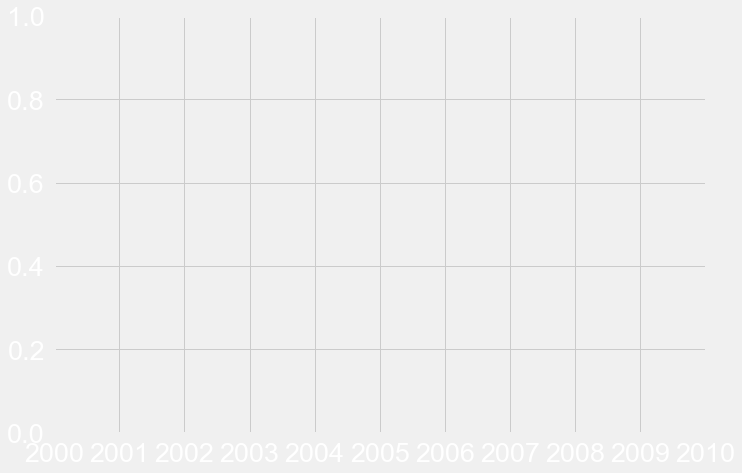

In [74]:
plt.plot(daterange, max_per_month)
plt.axvspan('1999-12-01 00:00:00', '1999-12-31 00:00:00', color='red', alpha=0.5)
plt.xticks(np.round(np.linspace(xmin, xmax, 4), 2))
plt.title("Max per month")